In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('climate_action_data.csv')
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [26]:
df.shape

(913, 10)

In [27]:
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [28]:
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [29]:
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [30]:
numeric_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        #change them to numeric
        df[col]= pd.to_numeric(df[col], errors='coerce')
        #Replace NaN with median
        df[col] = df[col].fillna(df[col].median())
        
    else:
        print(f'{col} is not part of the dataset')

print(f'Datatypes after handling numeric values')
df.dtypes

Datatypes after handling numeric values


Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [31]:
#Non numeric cols
non_numeric_cols = ['Sensor_ID','Crop_Type','Drone_Image_ID']
#Replace null values with the mode
for col in non_numeric_cols:
    if col in df.columns:
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        print(f'{col} is not a column in the dataset')
print('Null values in the dataset after handling:')
df.isnull().sum()

Null values in the dataset after handling:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [32]:
#Deal with dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dtypes

Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object

In [33]:
print(f"The number of duplicate row is{df.duplicated().sum()}")
duplicate_rows=df[df.duplicated(keep=False)]
#note: keep=False parameter marks all duplicate rows are True.
#both the first occurrence and subsequent duplicates
#which returns all instances of the duplicates
duplicate_rows.head(10)

The number of duplicate row is111


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
16,SEN-1016,2025-01-17,31.30,6.57,34.9,53.1,Maize,143.2,6.6,IMG-2016
19,SEN-1019,2025-01-20,30.39,5.67,30.4,53.3,Wheat,122.2,16.3,IMG-2019
23,SEN-1023,2025-01-24,35.65,5.89,34.3,57.5,Maize,95.7,15.3,IMG-2023
47,SEN-1047,2025-02-17,46.40,7.99,32.0,41.7,Beans,66.5,23.8,IMG-2047
50,SEN-1050,2025-02-20,77.87,4.73,18.6,46.2,Beans,136.5,23.1,IMG-2050
56,SEN-1056,2025-02-26,16.19,4.63,27.4,56.6,Wheat,97.9,23.6,IMG-2056
59,SEN-1059,2025-03-01,32.77,4.73,25.6,54.1,Wheat,116.9,23.7,IMG-2059
60,SEN-1060,2025-03-02,37.21,7.21,28.2,89.6,Wheat,112.8,27.9,IMG-2060


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
print(f"The number of duplicate rows after dropping is {df.duplicated().sum()}")

The number of duplicate rows after dropping is 0


In [36]:
df['Date'].isnull().sum()

np.int64(4)

In [37]:
df[df['Date'].duplicated(keep=False)]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
449,SEN-1449,NaT,15.85,6.66,19.4,51.5,Tomatoes,72.2,23.8,IMG-2449
456,SEN-1456,NaT,10.79,5.20,25.9,43.3,Tomatoes,120.3,14.9,IMG-2456
484,SEN-1484,NaT,50.90,5.64,27.2,34.1,Lettuce,105.0,10.2,IMG-2484
801,SEN-1510,NaT,52.94,4.78,20.4,43.8,Beans,84.1,28.1,IMG-2510


In [38]:
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2026-02-04 07:45:33.834586624,44.766353,6.249084,26.461471,60.033292,87.460723,17.392269
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.947500,5.330000,22.300000,46.025000,57.925000,11.300000
50%,2026-02-03 12:00:00,45.230000,6.285000,26.600000,59.500000,85.950000,17.400000
75%,2026-08-23 18:00:00,62.555000,7.080000,30.600000,75.275000,117.675000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460694,1.021579,4.863302,17.416061,34.765497,7.140127


In [39]:
df.dropna(subset=['Date'], inplace=True)


In [40]:
df[df['Date'].duplicated(keep=False)]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID


In [41]:
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,2026-02-04 07:45:33.834586624,44.827237,6.252487,26.477694,60.117794,87.420927,17.382957
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.970000,5.330000,22.325000,46.100000,57.825000,11.300000
50%,2026-02-03 12:00:00,45.230000,6.292500,26.600000,59.600000,85.950000,17.400000
75%,2026-08-23 18:00:00,62.642500,7.080000,30.600000,75.300000,117.675000,23.675000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.447709,1.021804,4.864196,17.413132,34.823249,7.139266


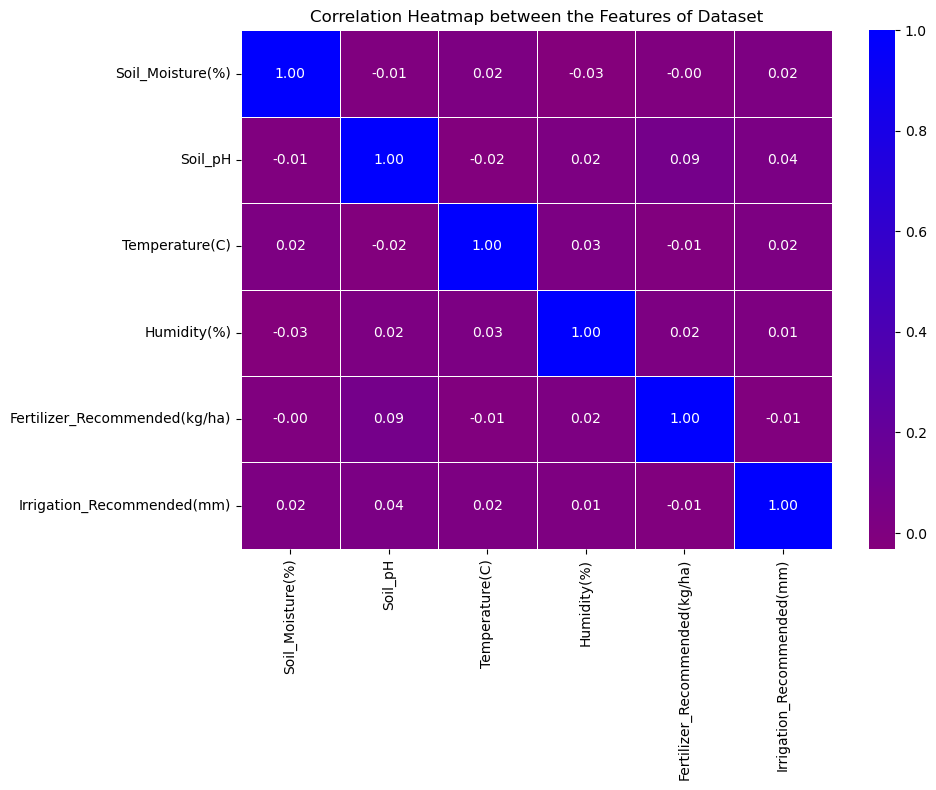

In [42]:
# Analysis
# Correlation Analysis
# Calculate correlation matrix
# Correlation Analysis
from matplotlib.colors import LinearSegmentedColormap


corr_matrix = df[numeric_cols].corr()

# Custom colormap: red (-1) → purple (0) → blue (+1)
custom_cmap = LinearSegmentedColormap.from_list(
    'BluePurpleRed',
    ['red', 'purple', 'blue'],
    N=256
)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=custom_cmap,
    fmt='.2f',
    linewidths=0.5,
    center=0  # 👈 center should be a number, not True
)
plt.title('Correlation Heatmap between the Features of Dataset')
plt.tight_layout()
plt.show()

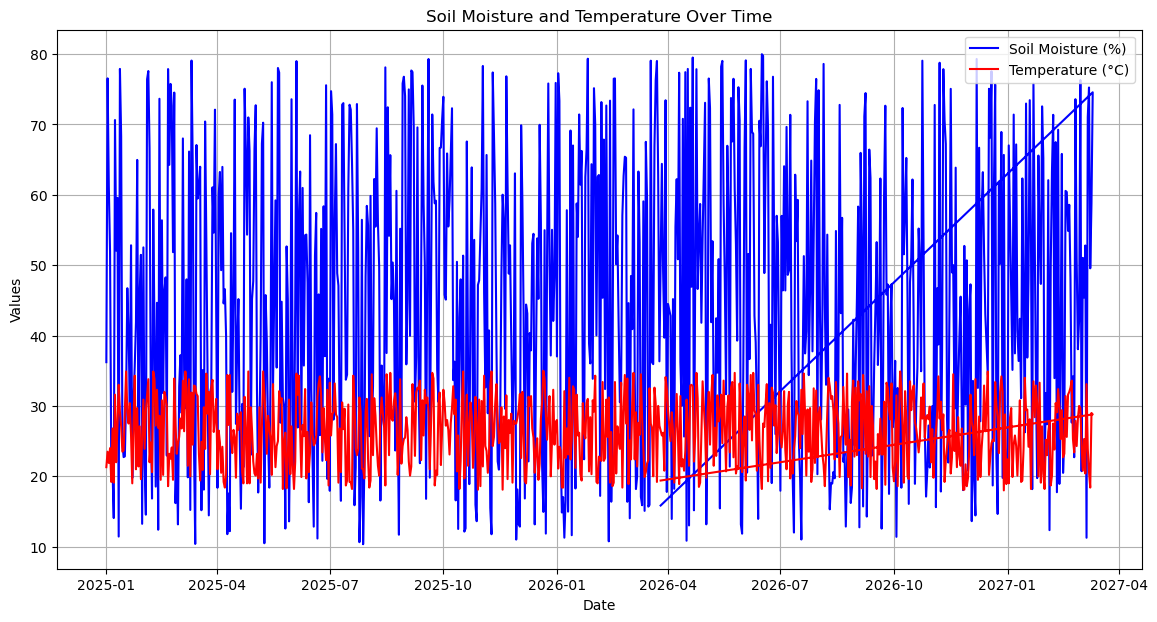

In [43]:
# Time series analysis of soil moisture and temperature
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Soil_Moisture(%)'], label='Soil Moisture (%)', color='blue')
plt.plot(df['Date'], df['Temperature(C)'], label='Temperature (°C)', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Soil Moisture and Temperature Over Time')
plt.legend()
plt.grid()
plt.show()

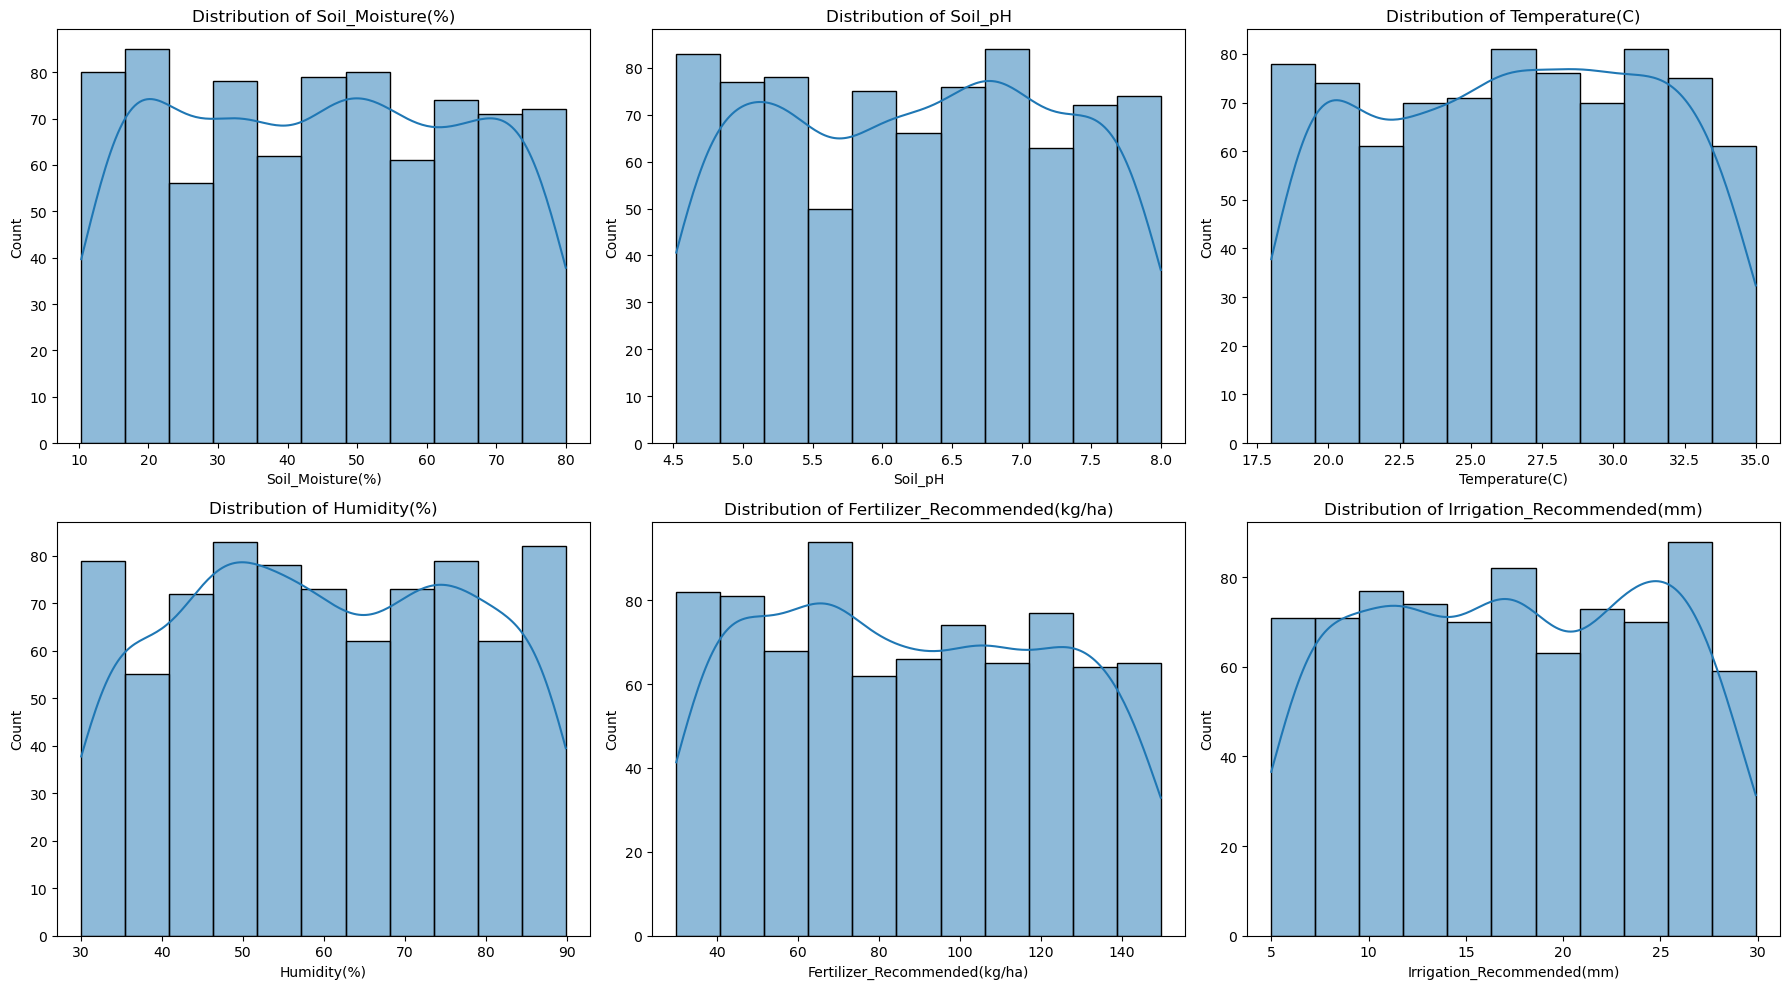

In [44]:
# Distribution plots for key variables
# checking for any outliers.
plt.figure(figsize=(18, 10))
#this is whole grid.

for i, col in enumerate(numeric_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()

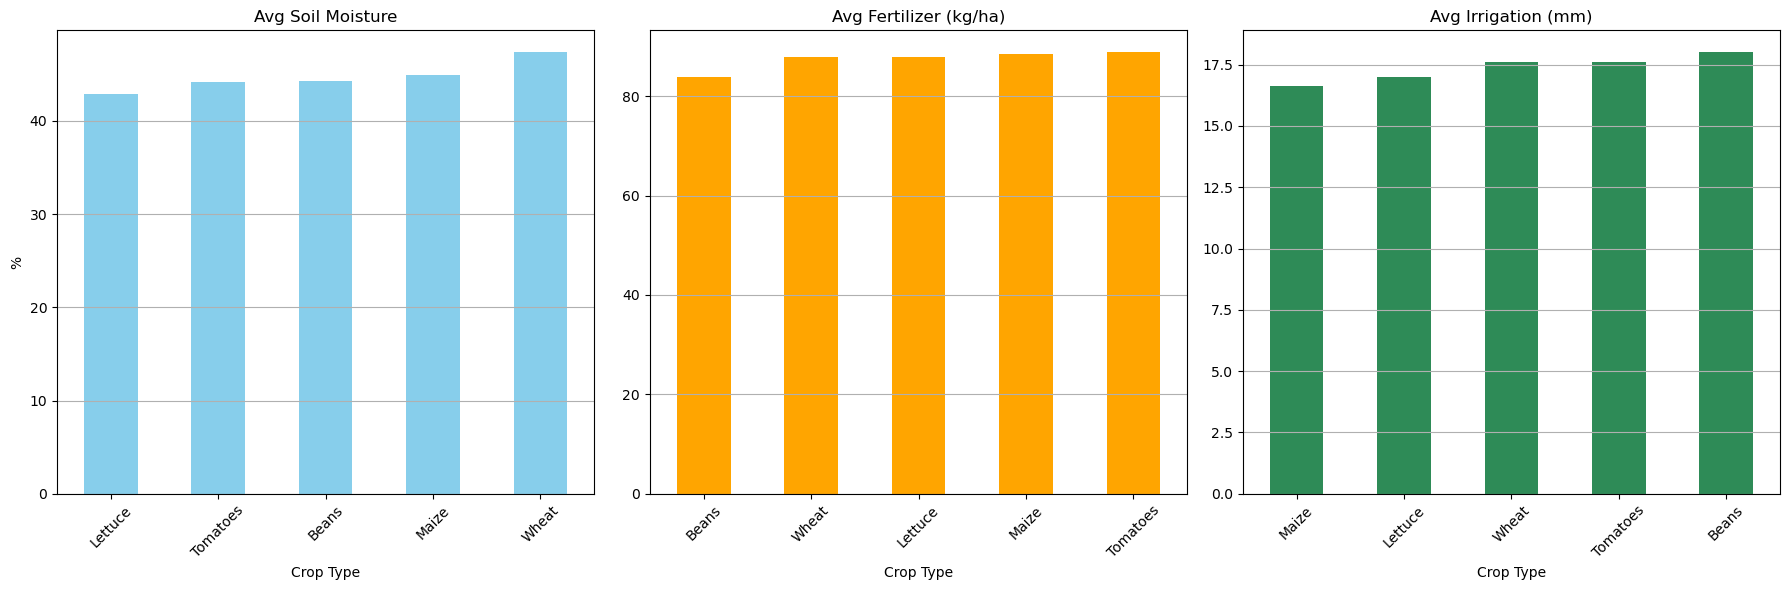

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Avg Soil Moisture')
axs[0].set_ylabel('%')

df.groupby('Crop_Type')['Fertilizer_Recommended(kg/ha)'].mean().sort_values().plot(kind='bar', ax=axs[1], color='orange')
axs[1].set_title('Avg Fertilizer (kg/ha)')

df.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values().plot(kind='bar', ax=axs[2], color='seagreen')
axs[2].set_title('Avg Irrigation (mm)')

for ax in axs:
    ax.set_xlabel('Crop Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()


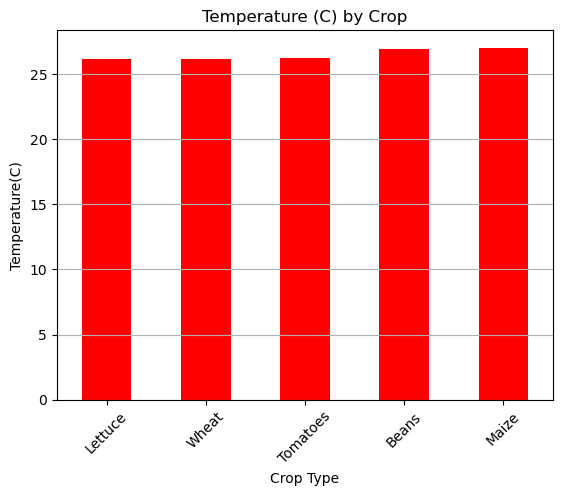

In [46]:
avg_irrigation = df.groupby('Crop_Type')['Temperature(C)'].mean().sort_values()

avg_irrigation.plot(kind='bar', color='red')
plt.title('Temperature (C) by Crop')
plt.ylabel('Temperature(C)')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Analysis
## Key Findings
1. The climate_action_dataset shows a strong correlation between:
    - Soil_pH and Fertilizer_Recommended(kg/ha)

2. `Wheat` have the highest average soil moisture among all crops

3. `Beans` and `Tomatoes` have the highest average irrigation requirements among all crops


## Recommendations
1. Irrigation and fertizer provision should be based on the crop type.
2. Soil moisture should be monitored for `wheat`
3. For areas with `30°C`, i recommend a 15% increase in the irrigation for all crops.

In [47]:
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,2026-02-04 07:45:33.834586624,44.827237,6.252487,26.477694,60.117794,87.420927,17.382957
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.970000,5.330000,22.325000,46.100000,57.825000,11.300000
50%,2026-02-03 12:00:00,45.230000,6.292500,26.600000,59.600000,85.950000,17.400000
75%,2026-08-23 18:00:00,62.642500,7.080000,30.600000,75.300000,117.675000,23.675000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.447709,1.021804,4.864196,17.413132,34.823249,7.139266


In [48]:
df.to_csv("cleaned_precision_agriculture_data.csv")